In [142]:
#from selenium import webdriver
import codecs
import time
import numpy as np
import pandas as pd
import os
import math
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from dateutil.parser import parse
import matplotlib as mpl
from numpy import savetxt

In [143]:
repo = os.path.dirname(os.path.abspath(''))

## These several cells were commented out because it needs to install chromedriver selenium and I have collected the data and saved them to CSV for saving time.

In [144]:
'''
def getData(url):
    driver = webdriver.Chrome()
    driver.get(url)
    time.sleep(2)
    loss_data = []
    for column in [3, 8, 10]:
        item = driver.find_element_by_xpath(f'//*[@id="summary-stats"]/tbody/tr[9]/td[{column}]')
        if len(item.text)==0:
            loss_data.append(np.nan)
        else:
            loss_data.append(item.text)
    driver.quit()
    return loss_data
'''

'\ndef getData(url):\n    driver = webdriver.Chrome()\n    driver.get(url)\n    time.sleep(2)\n    loss_data = []\n    for column in [3, 8, 10]:\n        item = driver.find_element_by_xpath(f\'//*[@id="summary-stats"]/tbody/tr[9]/td[{column}]\')\n        if len(item.text)==0:\n            loss_data.append(np.nan)\n        else:\n            loss_data.append(item.text)\n    driver.quit()\n    return loss_data\n'

# 1. Get ropical Cyclone cost

### a. read data from internet

In [145]:
'''
loss_data_origin = []
for year in range(1980, 2021):
    loss_data_origin.append(getData(f'https://www.ncdc.noaa.gov/billions/summary-stats/US/{year}'))
'''

"\nloss_data_origin = []\nfor year in range(1980, 2021):\n    loss_data_origin.append(getData(f'https://www.ncdc.noaa.gov/billions/summary-stats/US/{year}'))\n"

In [146]:
'''
loss_data_origin3 = np.array(loss_data_origin)
loss_data_origin4 = pd.DataFrame({'Event':loss_data_origin3[:,0], 'Cost':loss_data_origin3[:,1], 'Death':loss_data_origin3[:,2]})
loss_data_origin4
'''

"\nloss_data_origin3 = np.array(loss_data_origin)\nloss_data_origin4 = pd.DataFrame({'Event':loss_data_origin3[:,0], 'Cost':loss_data_origin3[:,1], 'Death':loss_data_origin3[:,2]})\nloss_data_origin4\n"

In [147]:
'''loss_data_origin4.to_csv(os.path.join(repo, "data", "interim", "Ropical Cyclone cost.csv"))'''

'loss_data_origin4.to_csv(os.path.join(repo, "data", "interim", "Ropical Cyclone cost.csv"))'

### b. read data from csv

In [148]:
loss_data_origin5 = pd.read_csv(os.path.join(repo, "data", "interim", "Ropical Cyclone cost.csv"))

In [149]:
loss_data_origin = []
for i in range(len(loss_data_origin5)):
    loss_data_origin.append(list(loss_data_origin5.iloc[i, 1:4]))

In [150]:
loss_data_origin

[['1.0', '$2.0B', '13'],
 ['--', '--', '--'],
 ['--', '--', '--'],
 ['1.0', '$8.3B', '21'],
 ['--', '--', '--'],
 ['3.0', '$9.3B', '78'],
 ['--', '--', '--'],
 ['--', '--', '--'],
 ['--', '--', '--'],
 ['1.0', '$20.0B', '86'],
 ['--', '--', '--'],
 ['1.0', '$3.0B', '18'],
 ['2.0', '$58.7B', '68'],
 ['--', '--', '--'],
 ['1.0', '$1.8B', '32'],
 ['3.0', '$13.7B', '46'],
 ['1.0', '$8.7B', '37'],
 ['--', '--', '--'],
 ['3.0', '$12.8B', '21'],
 ['1.0', '$10.6B', '77'],
 ['--', '--', '--'],
 ['1.0', '$13.1B', '43'],
 ['2.0', '$3.4B', '7'],
 ['1.0', '$8.1B', '55'],
 ['4.0', '$78.0B', '168'],
 ['4.0', '$232.7B', '2,002'],
 ['--', '--', '--'],
 ['--', '--', '--'],
 ['3.0', '$47.7B', '168'],
 ['--', '--', '--'],
 ['--', '--', '--'],
 ['2.0', '$19.6B', '66'],
 ['2.0', '$80.7B', '168'],
 ['--', '--', '--'],
 ['--', '--', '--'],
 ['--', '--', '--'],
 ['1.0', '$11.4B', '49'],
 ['3.0', '$288.9B', '3,167'],
 ['2.0', '$52.2B', '102'],
 ['2.0', '$7.0B', '15'],
 ['7.0', '$42.3B', '86']]

In [151]:
loss_data = loss_data_origin.copy()

In [152]:
loss_data

[['1.0', '$2.0B', '13'],
 ['--', '--', '--'],
 ['--', '--', '--'],
 ['1.0', '$8.3B', '21'],
 ['--', '--', '--'],
 ['3.0', '$9.3B', '78'],
 ['--', '--', '--'],
 ['--', '--', '--'],
 ['--', '--', '--'],
 ['1.0', '$20.0B', '86'],
 ['--', '--', '--'],
 ['1.0', '$3.0B', '18'],
 ['2.0', '$58.7B', '68'],
 ['--', '--', '--'],
 ['1.0', '$1.8B', '32'],
 ['3.0', '$13.7B', '46'],
 ['1.0', '$8.7B', '37'],
 ['--', '--', '--'],
 ['3.0', '$12.8B', '21'],
 ['1.0', '$10.6B', '77'],
 ['--', '--', '--'],
 ['1.0', '$13.1B', '43'],
 ['2.0', '$3.4B', '7'],
 ['1.0', '$8.1B', '55'],
 ['4.0', '$78.0B', '168'],
 ['4.0', '$232.7B', '2,002'],
 ['--', '--', '--'],
 ['--', '--', '--'],
 ['3.0', '$47.7B', '168'],
 ['--', '--', '--'],
 ['--', '--', '--'],
 ['2.0', '$19.6B', '66'],
 ['2.0', '$80.7B', '168'],
 ['--', '--', '--'],
 ['--', '--', '--'],
 ['--', '--', '--'],
 ['1.0', '$11.4B', '49'],
 ['3.0', '$288.9B', '3,167'],
 ['2.0', '$52.2B', '102'],
 ['2.0', '$7.0B', '15'],
 ['7.0', '$42.3B', '86']]

In [25]:
columns = [year for year in range(1980, 2021)]
index = ['EVENTS', 'COST', 'DEATHS']
loss_dict = dict(zip(columns, loss_data))
df_loss = pd.DataFrame(loss_dict, index = index)

In [26]:
df_loss = df_loss.T
df_loss

,EVENTS,COST,DEATHS
1980,1.0,$2.0B,13
1981,--,--,--
1982,--,--,--
1983,1.0,$8.3B,21
1984,--,--,--
1985,3.0,$9.3B,78
1986,--,--,--
1987,--,--,--
1988,--,--,--
1989,1.0,$20.0B,86


In [27]:
storm = pd.read_csv(os.path.join(repo, "data", "interim", "Storms1980.csv"))

In [28]:
storm['date'] = storm.LF_DateTime.apply(lambda x: x[:4])

In [29]:
storm.groupby('date').count()

,Unnamed: 0,Name,Category,StormSpeed,WindSpeed,LF_DateTime,LF_Lat,LF_Lon,LF_StormSpeed,LF_WindSpeed,...,LF_RadiusCat2,LF_RadiusCat3,LF_RadiusCat4,LF_RadiusCat5,LF_DurationCat0,LF_DurationCat1,LF_DurationCat2,LF_DurationCat3,LF_DurationCat4,LF_DurationCat5
date,,,,,,,,,,,,,,,,,,,,,
1981,3,3,3,3,3,3,3,3,3,3,...,0,0,0,0,3,3,3,3,3,3
1983,2,2,2,2,2,2,2,2,2,2,...,0,0,0,0,2,2,2,2,2,2
1984,3,3,3,3,3,3,3,3,3,3,...,0,0,0,0,3,3,3,3,3,3
1985,6,6,6,6,6,6,6,6,6,6,...,0,0,0,0,6,6,6,6,6,6
1986,2,2,2,2,2,2,2,2,2,2,...,0,0,0,0,2,2,2,2,2,2
1987,3,3,3,3,3,3,3,3,3,3,...,0,0,0,0,3,3,3,3,3,3
1988,4,4,4,4,4,4,4,4,4,4,...,0,0,0,0,4,4,4,4,4,4
1989,4,4,4,4,4,4,4,4,4,4,...,0,0,0,0,4,4,4,4,4,4
1990,3,3,3,3,3,3,3,3,3,3,...,0,0,0,0,3,3,3,3,3,3


In [30]:
df_loss = df_loss[df_loss.EVENTS!='--']
df_loss

,EVENTS,COST,DEATHS
1980,1.0,$2.0B,13
1983,1.0,$8.3B,21
1985,3.0,$9.3B,78
1989,1.0,$20.0B,86
1991,1.0,$3.0B,18
1992,2.0,$58.7B,68
1994,1.0,$1.8B,32
1995,3.0,$13.7B,46
1996,1.0,$8.7B,37
1998,3.0,$12.8B,21


In [31]:
df_loss1 = df_loss.copy()
df_loss1.COST = df_loss1.COST.apply(lambda x: float(x[1:-1]))
df_loss1

,EVENTS,COST,DEATHS
1980,1.0,2.0,13
1983,1.0,8.3,21
1985,3.0,9.3,78
1989,1.0,20.0,86
1991,1.0,3.0,18
1992,2.0,58.7,68
1994,1.0,1.8,32
1995,3.0,13.7,46
1996,1.0,8.7,37
1998,3.0,12.8,21


In [32]:
df_loss1.EVENTS = df_loss1.EVENTS.apply(lambda x: float(x))
df_loss1

,EVENTS,COST,DEATHS
1980,1.0,2.0,13
1983,1.0,8.3,21
1985,3.0,9.3,78
1989,1.0,20.0,86
1991,1.0,3.0,18
1992,2.0,58.7,68
1994,1.0,1.8,32
1995,3.0,13.7,46
1996,1.0,8.7,37
1998,3.0,12.8,21


In [33]:
df_loss1['COST/EVENTS'] = df_loss1.COST/df_loss1.EVENTS
df_loss1

,EVENTS,COST,DEATHS,COST/EVENTS
1980,1.0,2.0,13,2.000000
1983,1.0,8.3,21,8.300000
1985,3.0,9.3,78,3.100000
1989,1.0,20.0,86,20.000000
1991,1.0,3.0,18,3.000000
1992,2.0,58.7,68,29.350000
1994,1.0,1.8,32,1.800000
1995,3.0,13.7,46,4.566667
1996,1.0,8.7,37,8.700000
1998,3.0,12.8,21,4.266667


# 2. Get storm and assets and calculate the distance between them

In [34]:
#from scrip 2 Aishwarya Singh
assets1 = pd.read_csv(os.path.join(repo, "data", "external", "SoldScreen1.csv"), na_values = '-')
assets2 = pd.read_csv(os.path.join(repo, "data", "external", "SoldScreen2.csv"), na_values = '-')
assets3 = pd.read_csv(os.path.join(repo, "data", "external", "CurrentScreen.csv"), na_values = '-')
assets = (assets1.append(assets2)).append(assets3)
assets.reset_index(inplace = True)
assets.drop('index', axis = 1, inplace = True)
assets.AcquisitionDate = pd.to_datetime(assets.AcquisitionDate)
assets.SoldDate = pd.to_datetime(assets.SoldDate)
storms = pd.read_csv(os.path.join(repo, "data", "interim", "Storms1980.csv"), index_col = 0, na_values = ['', ' '])
storms.LF_DateTime = pd.to_datetime(storms.LF_DateTime)
storms.Category = storms.Category.astype(int)
storms.fillna({'LF_RadiusCat1':0, 'LF_RadiusCat2':0, 'LF_RadiusCat3':0, 'LF_RadiusCat4':0, 'LF_RadiusCat5':0}, inplace = True)
years = []
for i in storms.index:
    years.append(storms.iloc[i].LF_DateTime.year)
storms.insert(0, 'Year', years)

In [35]:
# Thanks the distance function code from scrip2 Aishwarya
def mapper(assetlat, assetlon, stormlat, stormlon, stormdata, stormcatrad):
    '''Haversine distance geolocation-based mapping function.'''
    
    stormmap = np.zeros((len(assetlat), len(stormlat)))
    count_average_distance_each_strom = []
    n_assets_list = []
    # loop over storms
    for j in range(len(stormlat)):
        count_distance = 0
        n_assets = 0
        # parallel-loop over assets
        for i in range(len(assetlat)):
            
            # calculate Haversine distance on spherical Earth surface in nm
            alon, alat, slon, slat = map(np.radians, [assetlon[i], assetlat[i], stormlon[j], stormlat[j]])
            
            dlon = np.abs(slon - alon)
            dlat = np.abs(slat - alat)
            
            z = np.sin(dlat / 2.0)**2 + (np.cos(alat) * np.cos(slat) * np.sin(dlon / 2.0)**2)
            
            c = 2 * np.arcsin(np.sqrt(z))
            
            # 3440.1 is the radius of the Earth in nm
            distance = 3440.1 * c
            # loop skip if asset is not affected by storm
            if distance > stormcatrad[j, 0]:
                continue
            
            if math.isnan (distance)==False:
                count_distance+=distance
                n_assets+=1
        if n_assets!=0:
            count_average_distance_each_strom.append(count_distance/n_assets)
            n_assets_list.append(n_assets)
        else:
            count_average_distance_each_strom.append(0)
            n_assets_list.append(n_assets)
    return count_average_distance_each_strom, stormdata, n_assets_list

In [36]:
storms.LF_DateTime = storms.LF_DateTime.astype(str)

In [37]:
storms['date'] = storms.LF_DateTime.apply(lambda x: x[:4])

In [38]:
assetlat = np.asarray(assets.Latitude)
assetlon = np.asarray(assets.Longitude)
stormlat = np.asarray(storms.LF_Lat)
stormlon = np.asarray(storms.LF_Lon)
stormdata = np.asarray(storms.date)
stormcategory = np.asarray(storms.Category)
stormSpeed = np.asarray(storms.StormSpeed)
WindSpeed = np.asarray(storms.WindSpeed)
LF_DurationCat0 = np.asarray(storms.LF_DurationCat0)
stormcatrad = np.asarray(storms[['LF_RadiusCat0', 'LF_RadiusCat1', 'LF_RadiusCat2', 'LF_RadiusCat3', 'LF_RadiusCat4', 'LF_RadiusCat5']])

In [39]:
count_average_distance_each_strom, stormdata, n_assets_list = mapper(assetlat, assetlon, stormlat, stormlon, stormdata, stormcatrad)

In [40]:
len(count_average_distance_each_strom)

153

In [41]:
len(stormdata)

153

In [42]:
distance_dict = {'average_distance':count_average_distance_each_strom, 'year':stormdata, 'category':stormcategory, 'StormSpeed':stormSpeed,'WindSpeed':WindSpeed, 'LF_DurationCat0':LF_DurationCat0, 'n_assets_list':n_assets_list}
average_distance = pd.DataFrame(distance_dict)
average_distance

,average_distance,year,category,StormSpeed,WindSpeed,LF_DurationCat0,n_assets_list
0,1281.519032,1981,1,26.0,70.0,60.0,133537
1,1848.486687,1981,2,32.0,90.0,3.0,133537
2,1352.818511,1981,1,29.0,75.0,3.0,133537
3,943.571565,1983,3,14.0,100.0,18.0,133537
4,1019.488888,1983,1,17.0,70.0,15.0,133537
...,...,...,...,...,...,...,...
148,25.928484,2020,1,9.0,65.0,12.0,7
149,17.744847,2020,4,20.0,120.0,27.0,34
150,28.741024,2020,3,54.0,100.0,30.0,13
151,0.000000,2020,4,25.0,130.0,36.0,0


In [43]:
average_distance = average_distance[average_distance.average_distance!=0]
average_distance.reset_index(drop=True)

,average_distance,year,category,StormSpeed,WindSpeed,LF_DurationCat0,n_assets_list
0,1281.519032,1981,1,26.0,70.0,60.0,133537
1,1848.486687,1981,2,32.0,90.0,3.0,133537
2,1352.818511,1981,1,29.0,75.0,3.0,133537
3,943.571565,1983,3,14.0,100.0,18.0,133537
4,1019.488888,1983,1,17.0,70.0,15.0,133537
...,...,...,...,...,...,...,...
116,1446.471831,2020,4,36.0,120.0,0.0,133537
117,21.594644,2020,2,15.0,95.0,18.0,782
118,25.928484,2020,1,9.0,65.0,12.0,7
119,17.744847,2020,4,20.0,120.0,27.0,34


In [44]:
average_distance_year = average_distance.groupby('year').sum()/average_distance.groupby('year').count()
average_distance_year = average_distance_year.reset_index()
average_distance_year.year = average_distance_year.year.astype(str)
average_distance_year

,year,average_distance,category,StormSpeed,WindSpeed,LF_DurationCat0,n_assets_list
0,1981,1494.274744,1.333333,29.000000,78.333333,22.000000,133537.000000
1,1983,981.530226,2.000000,15.500000,85.000000,16.500000,133537.000000
2,1984,1492.059566,2.000000,34.333333,88.333333,14.000000,133537.000000
3,1985,1114.790326,2.166667,23.333333,93.333333,26.000000,133537.000000
4,1986,902.350903,1.000000,23.500000,72.500000,9.000000,133537.000000
5,1987,1374.108673,1.666667,37.000000,80.000000,4.000000,133537.000000
6,1988,1459.300540,2.750000,20.250000,105.000000,21.750000,133537.000000
7,1989,1368.624820,2.250000,32.000000,93.750000,12.000000,133537.000000
8,1990,1562.979199,1.333333,27.333333,73.333333,11.000000,133537.000000
9,1991,1267.997052,2.000000,29.000000,82.500000,10.500000,133537.000000


In [130]:
df_loss2 = df_loss1.copy()
df_loss2= df_loss1.reset_index()
df_loss2.columns = ['year', 'EVENTS', 'COST', 'DEATHS', 'COST/EVENTS']
df_loss2.year = df_loss2.year.astype(str)
df_loss2

,year,EVENTS,COST,DEATHS,COST/EVENTS
0,1980,1.0,2.0,13,2.000000
1,1983,1.0,8.3,21,8.300000
2,1985,3.0,9.3,78,3.100000
3,1989,1.0,20.0,86,20.000000
4,1991,1.0,3.0,18,3.000000
5,1992,2.0,58.7,68,29.350000
6,1994,1.0,1.8,32,1.800000
7,1995,3.0,13.7,46,4.566667
8,1996,1.0,8.7,37,8.700000
9,1998,3.0,12.8,21,4.266667


In [131]:
loss_and_distance = df_loss2.merge(average_distance_year, how='left', on='year')
loss_and_distance

,year,EVENTS,COST,DEATHS,COST/EVENTS,average_distance,category,StormSpeed,WindSpeed,LF_DurationCat0,n_assets_list
0,1980,1.0,2.0,13,2.000000,NaN,NaN,NaN,NaN,NaN,NaN
1,1983,1.0,8.3,21,8.300000,981.530226,2.000000,15.500000,85.000000,16.500000,133537.000000
2,1985,3.0,9.3,78,3.100000,1114.790326,2.166667,23.333333,93.333333,26.000000,133537.000000
3,1989,1.0,20.0,86,20.000000,1368.624820,2.250000,32.000000,93.750000,12.000000,133537.000000
4,1991,1.0,3.0,18,3.000000,1267.997052,2.000000,29.000000,82.500000,10.500000,133537.000000
5,1992,2.0,58.7,68,29.350000,2371.728617,3.000000,28.000000,112.500000,15.000000,133537.000000
6,1994,1.0,1.8,32,1.800000,1665.219805,1.000000,35.000000,75.000000,21.000000,133537.000000
7,1995,3.0,13.7,46,4.566667,1226.210576,2.500000,28.750000,95.000000,21.000000,133537.000000
8,1996,1.0,8.7,37,8.700000,1334.137338,2.500000,27.666667,95.000000,20.000000,133537.000000
9,1998,3.0,12.8,21,4.266667,1780.887645,3.200000,33.400000,113.000000,36.000000,133537.000000


In [132]:
loss_and_distance = loss_and_distance.dropna()

In [133]:
loss_and_distance

,year,EVENTS,COST,DEATHS,COST/EVENTS,average_distance,category,StormSpeed,WindSpeed,LF_DurationCat0,n_assets_list
1,1983,1.0,8.3,21,8.300000,981.530226,2.000000,15.500000,85.000000,16.500000,133537.000000
2,1985,3.0,9.3,78,3.100000,1114.790326,2.166667,23.333333,93.333333,26.000000,133537.000000
3,1989,1.0,20.0,86,20.000000,1368.624820,2.250000,32.000000,93.750000,12.000000,133537.000000
4,1991,1.0,3.0,18,3.000000,1267.997052,2.000000,29.000000,82.500000,10.500000,133537.000000
5,1992,2.0,58.7,68,29.350000,2371.728617,3.000000,28.000000,112.500000,15.000000,133537.000000
6,1994,1.0,1.8,32,1.800000,1665.219805,1.000000,35.000000,75.000000,21.000000,133537.000000
7,1995,3.0,13.7,46,4.566667,1226.210576,2.500000,28.750000,95.000000,21.000000,133537.000000
8,1996,1.0,8.7,37,8.700000,1334.137338,2.500000,27.666667,95.000000,20.000000,133537.000000
9,1998,3.0,12.8,21,4.266667,1780.887645,3.200000,33.400000,113.000000,36.000000,133537.000000
10,1999,1.0,10.6,77,10.600000,1027.339388,3.000000,36.000000,111.250000,17.250000,133537.000000


In [134]:
loss_and_distance_ave = loss_and_distance.copy()
loss_and_distance_ave['COST'] = loss_and_distance_ave['COST/EVENTS']/loss_and_distance_ave['n_assets_list']
loss_and_distance_ave['COST'] = loss_and_distance_ave['COST']*(10**6)
loss_and_distance_ave#unit is thousand

,year,EVENTS,COST,DEATHS,COST/EVENTS,average_distance,category,StormSpeed,WindSpeed,LF_DurationCat0,n_assets_list
1,1983,1.0,62.155058,21,8.300000,981.530226,2.000000,15.500000,85.000000,16.500000,133537.000000
2,1985,3.0,23.214540,78,3.100000,1114.790326,2.166667,23.333333,93.333333,26.000000,133537.000000
3,1989,1.0,149.771224,86,20.000000,1368.624820,2.250000,32.000000,93.750000,12.000000,133537.000000
4,1991,1.0,22.465684,18,3.000000,1267.997052,2.000000,29.000000,82.500000,10.500000,133537.000000
5,1992,2.0,219.789272,68,29.350000,2371.728617,3.000000,28.000000,112.500000,15.000000,133537.000000
6,1994,1.0,13.479410,32,1.800000,1665.219805,1.000000,35.000000,75.000000,21.000000,133537.000000
7,1995,3.0,34.197763,46,4.566667,1226.210576,2.500000,28.750000,95.000000,21.000000,133537.000000
8,1996,1.0,65.150483,37,8.700000,1334.137338,2.500000,27.666667,95.000000,20.000000,133537.000000
9,1998,3.0,31.951195,21,4.266667,1780.887645,3.200000,33.400000,113.000000,36.000000,133537.000000
10,1999,1.0,79.378749,77,10.600000,1027.339388,3.000000,36.000000,111.250000,17.250000,133537.000000


In [135]:
loss_and_distance1 = loss_and_distance_ave.copy()

In [136]:
#loss_and_distance1 = loss_and_distance_ave.drop(15)
#loss_and_distance1 = loss_and_distance_ave.drop(20)

In [137]:
loss_and_distance1

,year,EVENTS,COST,DEATHS,COST/EVENTS,average_distance,category,StormSpeed,WindSpeed,LF_DurationCat0,n_assets_list
1,1983,1.0,62.155058,21,8.300000,981.530226,2.000000,15.500000,85.000000,16.500000,133537.000000
2,1985,3.0,23.214540,78,3.100000,1114.790326,2.166667,23.333333,93.333333,26.000000,133537.000000
3,1989,1.0,149.771224,86,20.000000,1368.624820,2.250000,32.000000,93.750000,12.000000,133537.000000
4,1991,1.0,22.465684,18,3.000000,1267.997052,2.000000,29.000000,82.500000,10.500000,133537.000000
5,1992,2.0,219.789272,68,29.350000,2371.728617,3.000000,28.000000,112.500000,15.000000,133537.000000
6,1994,1.0,13.479410,32,1.800000,1665.219805,1.000000,35.000000,75.000000,21.000000,133537.000000
7,1995,3.0,34.197763,46,4.566667,1226.210576,2.500000,28.750000,95.000000,21.000000,133537.000000
8,1996,1.0,65.150483,37,8.700000,1334.137338,2.500000,27.666667,95.000000,20.000000,133537.000000
9,1998,3.0,31.951195,21,4.266667,1780.887645,3.200000,33.400000,113.000000,36.000000,133537.000000
10,1999,1.0,79.378749,77,10.600000,1027.339388,3.000000,36.000000,111.250000,17.250000,133537.000000


# 3.relationship and predict

### The relationship between category and COST

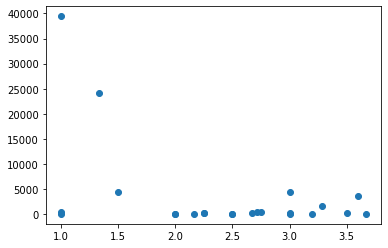

In [139]:
plt.scatter(loss_and_distance1['category'], loss_and_distance1['COST'])

### delete two unusual data

In [140]:
cata_loss_and_distance = loss_and_distance1.copy()
cata_loss_and_distance = cata_loss_and_distance.drop(16)
cata_loss_and_distance = cata_loss_and_distance.drop(19)

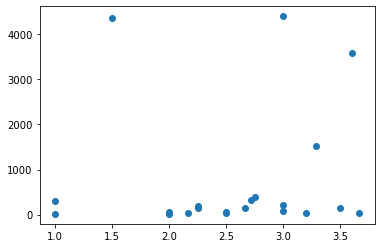

In [141]:
plt.scatter(cata_loss_and_distance['category'], cata_loss_and_distance['COST'])

In [59]:
loss_and_distance1

,year,EVENTS,COST,DEATHS,COST/EVENTS,average_distance,category,StormSpeed,WindSpeed,LF_DurationCat0,n_assets_list
1,1983,1.0,62.155058,21,8.300000,981.530226,2.000000,15.500000,85.000000,16.500000,133537.000000
2,1985,3.0,23.214540,78,3.100000,1114.790326,2.166667,23.333333,93.333333,26.000000,133537.000000
3,1989,1.0,149.771224,86,20.000000,1368.624820,2.250000,32.000000,93.750000,12.000000,133537.000000
4,1991,1.0,22.465684,18,3.000000,1267.997052,2.000000,29.000000,82.500000,10.500000,133537.000000
5,1992,2.0,219.789272,68,29.350000,2371.728617,3.000000,28.000000,112.500000,15.000000,133537.000000
6,1994,1.0,13.479410,32,1.800000,1665.219805,1.000000,35.000000,75.000000,21.000000,133537.000000
7,1995,3.0,34.197763,46,4.566667,1226.210576,2.500000,28.750000,95.000000,21.000000,133537.000000
8,1996,1.0,65.150483,37,8.700000,1334.137338,2.500000,27.666667,95.000000,20.000000,133537.000000
9,1998,3.0,31.951195,21,4.266667,1780.887645,3.200000,33.400000,113.000000,36.000000,133537.000000
10,1999,1.0,79.378749,77,10.600000,1027.339388,3.000000,36.000000,111.250000,17.250000,133537.000000


### The relationship between average_distance and COST

[Text(0.5, 1.0, 'The relationship between average_distance and COST'),
 Text(0.5, 0, 'average_distance'),
 Text(0, 0.5, 'COST')]

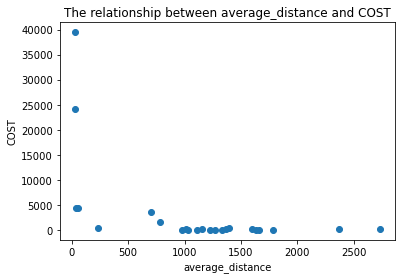

In [60]:
plt.scatter(loss_and_distance1['average_distance'], loss_and_distance1['COST'])
plt.gca().set(title='The relationship between average_distance and COST', xlabel='average_distance', ylabel='COST')

# 4. Nonparametric regression

In [61]:
loss_and_distance1 = loss_and_distance1.drop(16)
loss_and_distance1 = loss_and_distance1.drop(19)

In [62]:
x = (loss_and_distance1['average_distance']-loss_and_distance1['average_distance'].min())/(loss_and_distance1['average_distance'].max()-loss_and_distance1['average_distance'].min())

In [63]:
x = np.array(x)

In [64]:
def estimate(x, y, x0, h):
    w = np.exp(-(x-x0)**2/h)
    W = np.diag(w)
    x = x[:,None]
    X = np.concatenate(
        (np.ones(shape = x.shape),
        x-x0), axis = 1
    )
    B = np.linalg.inv(X.T@W@X)@X.T@W@y
    y_hat = B[0]
    return y_hat

In [65]:
maxlan = int(loss_and_distance1['average_distance'].max())+1
maxlan

2732

In [66]:
num = len(loss_and_distance1['average_distance'])
num

21

In [67]:
xhat = np.linspace(0,1,15)

In [68]:
loss_predict = np.array([estimate(x, loss_and_distance1['COST'], x0, 0.2) for x0 in xhat])

In [69]:
loss_predict

array([3375.88177279, 2817.89407319, 2284.16419971, 1781.3143026 ,
       1319.71400756,  912.92601848,  575.36877575,  318.0358003 ,
        143.80434405,   45.24535991,    6.78628953,    9.90761713,
         38.10128771,   79.38979986,  126.4346788 ])

[Text(0.5, 1.0, 'The relationship between average_distance and COST'),
 Text(0.5, 0, 'average_distance'),
 Text(0, 0.5, 'COST')]

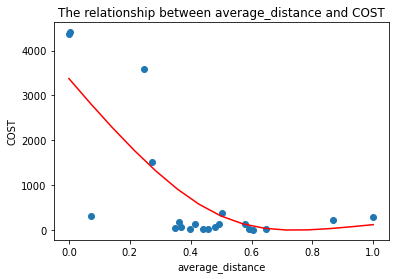

In [70]:
plt.scatter(x, loss_and_distance1['COST'])
plt.plot(xhat, loss_predict, c='r')
plt.gca().set(title='The relationship between average_distance and COST', xlabel='average_distance', ylabel='COST')

In [71]:
y = np.array(loss_and_distance1['COST'])

In [72]:
h = np.arange(0.01, 0.5, 0.01)
def loocv(x, y):
    error_loocv_h = []
    best_error = np.Inf
    best_index = -1
    for j in h:
        loocv_error = 0
        for i in range(len(x)):
            xx = np.delete(x, i)
            yy = np.delete(y, i)
            yhat = np.array(estimate(xx, yy, x[i], j))
            error = ((yhat-y[i])**2).sum()
            loocv_error+=error
        error_loocv_h.append(loocv_error)
        if best_error>loocv_error:
            best_error=loocv_error
            best_index = j
    
    print(f'The best h is {best_index}, and error is {best_error}')
    return error_loocv_h

In [73]:
error_loocv_h = loocv(x, y)

The best h is 0.01, and error is 20804675.760257237


In [74]:
loss_and_distance1.iloc[[13],[2,5]]

,COST,average_distance
14,146.026944,1596.933819


In [75]:
# The company is 1666 away from the new hurricane
x_predict = 1666

In [76]:
x_predict = (x_predict-loss_and_distance1['average_distance'].min())/(loss_and_distance1['average_distance'].max()-loss_and_distance1['average_distance'].min())

In [77]:
test_loss_predict = estimate(x, loss_and_distance1['COST'], x_predict, 0.2)

In [78]:
test_loss_predict

90.09901597467722

30%?

# 5. Do linear regression between COST and average_distance, drop two unusual vlaue

In [79]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [80]:
loss_and_distance_scale = loss_and_distance1.copy()

In [81]:
#loss_and_distance_scale = loss_and_distance_scale.drop(16)
#loss_and_distance_scale = loss_and_distance_scale.drop(19)

[Text(0.5, 1.0, 'The relationship between average_distance and COST'),
 Text(0.5, 0, 'average_distance'),
 Text(0, 0.5, 'COST')]

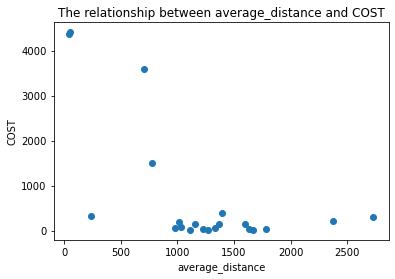

In [82]:
plt.scatter(loss_and_distance_scale['average_distance'], loss_and_distance_scale['COST'])
plt.gca().set(title='The relationship between average_distance and COST', xlabel='average_distance', ylabel='COST')

[Text(0.5, 1.0, 'The relationship between category and COST'),
 Text(0.5, 0, 'average_distance'),
 Text(0, 0.5, 'COST')]

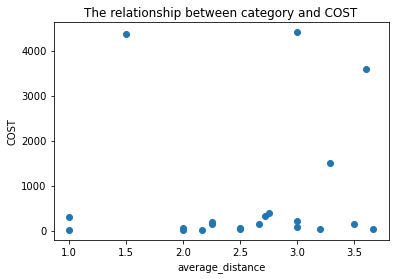

In [83]:
plt.scatter(loss_and_distance_scale['category'], loss_and_distance_scale['COST'])
plt.gca().set(title='The relationship between category and COST', xlabel='average_distance', ylabel='COST')

In [84]:
#X = loss_and_distance[['WindSpeed', 'category','average_distance', 'StormSpeed','LF_DurationCat0']]
X = loss_and_distance1[['average_distance']]
y = loss_and_distance1['COST']

In [85]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

In [86]:
reg = LinearRegression().fit(X_train, y_train)

In [87]:
reg.score(X_train, y_train)

0.49527950883161986

In [88]:
B = reg.coef_
A = reg.intercept_

In [89]:
B

array([-1.61826386])

[Text(0.5, 1.0, 'The relationship between average_distance and COST'),
 Text(0.5, 0, 'average_distance'),
 Text(0, 0.5, 'COST')]

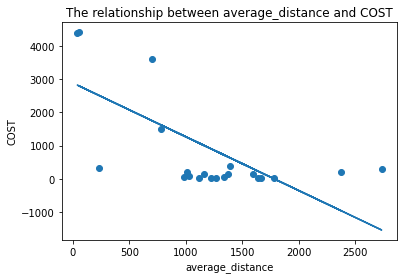

In [90]:
plt.scatter(loss_and_distance_scale['average_distance'], loss_and_distance_scale['COST'])
plt.plot(X_train, A+B*X_train)
plt.gca().set(title='The relationship between average_distance and COST', xlabel='average_distance', ylabel='COST')

In [91]:
X_test

,average_distance
17,1159.160520
23,233.901074
6,1665.219805


In [92]:
y_test

17    146.730749
23    314.764931
6      13.479410
Name: COST, dtype: float64

In [93]:
y_predict = reg.predict(X_test)
y_predict

array([1008.22662385, 2505.54054479,  189.289173  ])

In [94]:
((y_predict-y_test)**2).sum()/len(X_test)

1857527.3351628603

## Time series

In [95]:
years = [year for year in range(1980, 2021)]

In [96]:
time_lost = loss_data_origin.copy()

In [97]:
time_lost = np.array(time_lost)
time_lost

array([['1.0', '$2.0B', '13'],
       ['--', '--', '--'],
       ['--', '--', '--'],
       ['1.0', '$8.3B', '21'],
       ['--', '--', '--'],
       ['3.0', '$9.3B', '78'],
       ['--', '--', '--'],
       ['--', '--', '--'],
       ['--', '--', '--'],
       ['1.0', '$20.0B', '86'],
       ['--', '--', '--'],
       ['1.0', '$3.0B', '18'],
       ['2.0', '$58.7B', '68'],
       ['--', '--', '--'],
       ['1.0', '$1.8B', '32'],
       ['3.0', '$13.7B', '46'],
       ['1.0', '$8.7B', '37'],
       ['--', '--', '--'],
       ['3.0', '$12.8B', '21'],
       ['1.0', '$10.6B', '77'],
       ['--', '--', '--'],
       ['1.0', '$13.1B', '43'],
       ['2.0', '$3.4B', '7'],
       ['1.0', '$8.1B', '55'],
       ['4.0', '$78.0B', '168'],
       ['4.0', '$232.7B', '2,002'],
       ['--', '--', '--'],
       ['--', '--', '--'],
       ['3.0', '$47.7B', '168'],
       ['--', '--', '--'],
       ['--', '--', '--'],
       ['2.0', '$19.6B', '66'],
       ['2.0', '$80.7B', '168'],
       ['--', '-

In [98]:
loss_time_series = pd.DataFrame({'years':years, 'EVENTS' :time_lost[:,0], 'COST':time_lost[:,1], 'DEATH':time_lost[:,2]})

In [99]:
loss_time_series

,years,EVENTS,COST,DEATH
0,1980,1.0,$2.0B,13
1,1981,--,--,--
2,1982,--,--,--
3,1983,1.0,$8.3B,21
4,1984,--,--,--
5,1985,3.0,$9.3B,78
6,1986,--,--,--
7,1987,--,--,--
8,1988,--,--,--
9,1989,1.0,$20.0B,86


In [100]:
loss_time_series = loss_time_series.COST.apply(lambda x:0 if x=='--' else x)
loss_time_series.head(5)

0    $2.0B
1        0
2        0
3    $8.3B
4        0
Name: COST, dtype: object

In [101]:
loss_time_series = loss_time_series.apply(lambda x:x[1:-1] if x!=0 else x)
loss_time_series.head(5)

0    2.0
1      0
2      0
3    8.3
4      0
Name: COST, dtype: object

In [102]:
loss_time_series = loss_time_series.astype(float)

In [103]:
years = [year for year in range(1980, 2021)]

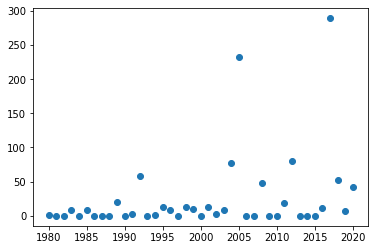

In [104]:
plt.scatter(years, loss_time_series)

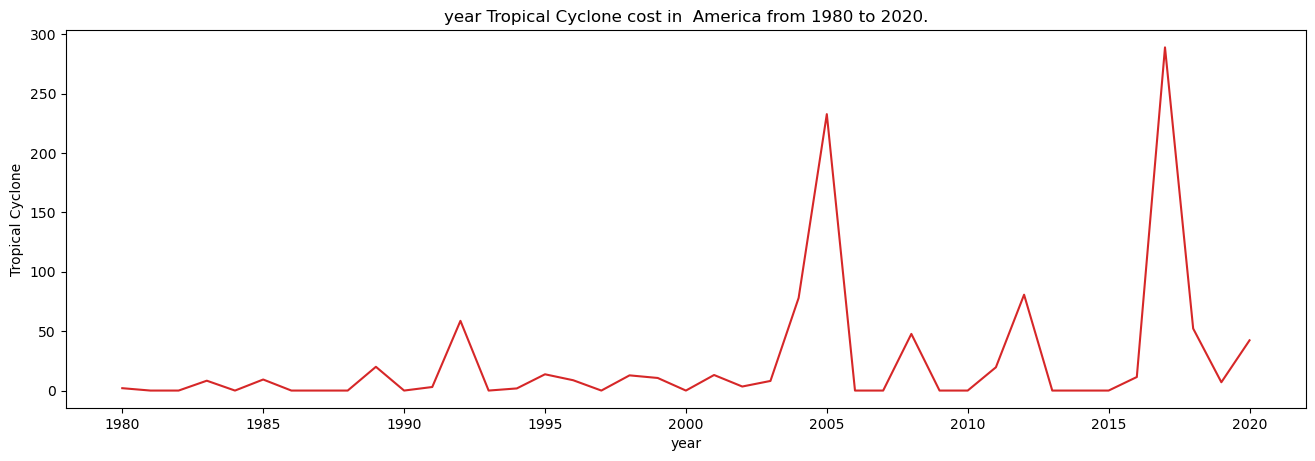

In [105]:
# Draw Plot
def plot_df(x, y, title="", xlabel='year', ylabel='Tropical Cyclone', dpi=100):
    plt.figure(figsize=(16,5), dpi=dpi)
    plt.plot(x, y, color='tab:red')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()

plot_df(x=years, y=loss_time_series, title='year Tropical Cyclone cost in  America from 1980 to 2020.')

In [106]:
loss_time_series1 = loss_time_series

In [107]:
loss_time_series.sort_index(inplace=True)

Text(0.5, 1.0, 'time series Detrend')

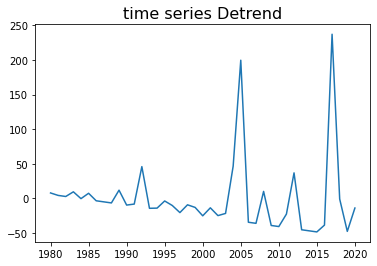

In [108]:
from scipy import signal
detrended = signal.detrend(loss_time_series)
plt.plot(years,detrended)
plt.title('time series Detrend', fontsize=16)

In [109]:
loss_time_series_frequent = pd.DataFrame({'years':years, 'EVENTS' :time_lost[:,0], 'COST':time_lost[:,1], 'DEATH':time_lost[:,2]})

In [110]:
loss_time_series_frequent.COST = loss_time_series_frequent.COST.apply(lambda x:0 if x=='--' else x)

In [111]:
loss_time_series_frequent.COST = loss_time_series_frequent.COST.apply(lambda x:x[1:-1] if x!=0 else x)

In [112]:
loss_time_series_frequent = loss_time_series_frequent[['years','COST']]
loss_time_series_frequent

,years,COST
0,1980,2.0
1,1981,0
2,1982,0
3,1983,8.3
4,1984,0
5,1985,9.3
6,1986,0
7,1987,0
8,1988,0
9,1989,20.0


In [113]:
loss_time_series_fb = loss_time_series_frequent.copy()

In [114]:
loss_time_series_frequent.years = loss_time_series_frequent.years.apply(lambda x: str(x)[0:3]+'0-'+str(int(str(x)[3])+1)+'-01')

In [115]:
#the year represent decade, month reprent year, day don't need to care. just for create trends
loss_time_series_frequent

,years,COST
0,1980-1-01,2.0
1,1980-2-01,0
2,1980-3-01,0
3,1980-4-01,8.3
4,1980-5-01,0
5,1980-6-01,9.3
6,1980-7-01,0
7,1980-8-01,0
8,1980-9-01,0
9,1980-10-01,20.0


In [116]:
loss_time_series_frequent.years = pd.to_datetime(loss_time_series_frequent.years)

In [117]:
loss_time_series_frequent.COST = loss_time_series_frequent.COST.astype(float)

### for strength the trends

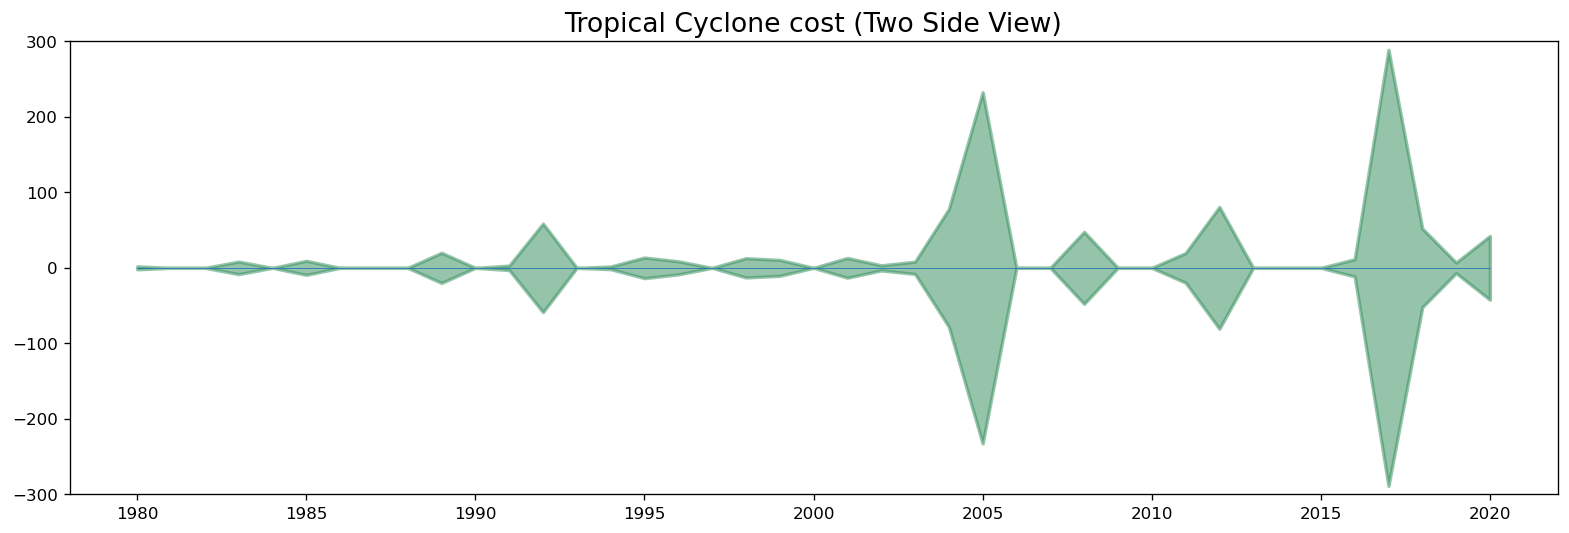

In [118]:
fig, ax = plt.subplots(1, 1, figsize=(16,5), dpi= 120)
plt.fill_between(years, y1=loss_time_series_frequent.COST, y2=-loss_time_series_frequent.COST, alpha=0.5, linewidth=2, color='seagreen')
plt.ylim(-300, 300)
plt.title('Tropical Cyclone cost (Two Side View)', fontsize=16)
plt.hlines(y=0, xmin=np.min(years), xmax=np.max(years), linewidth=.5)
plt.show()

In [119]:
time_series_loss = loss_time_series_fb.copy()

In [120]:
time_series_loss = time_series_loss.rename(columns={'years': 'ds', 'COST': 'y'})

In [121]:
time_series_loss.ds = time_series_loss.ds.apply(lambda x: str(x)+'-01-01')

In [122]:
time_series_loss.ds = pd.to_datetime(time_series_loss.ds)

In [123]:
import fbprophet

Importing plotly failed. Interactive plots will not work.


In [124]:
loss_prophet = fbprophet.Prophet(changepoint_prior_scale=0.15, daily_seasonality=False, weekly_seasonality=False)
loss_prophet.fit(time_series_loss)

In [125]:
loss_forecast = loss_prophet.make_future_dataframe(periods=10 * 2, freq='Y')

In [126]:
loss_forecast = loss_prophet.predict(loss_forecast)

In [127]:
loss_forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1980-01-01,177.631483,-82.440312,49.031791,177.631483,177.631483,-194.314977,-194.314977,-194.314977,-194.314977,-194.314977,-194.314977,0.0,0.0,0.0,-16.683494
1,1981-01-01,179.229175,-54.042362,80.089567,179.229175,179.229175,-169.979834,-169.979834,-169.979834,-169.979834,-169.979834,-169.979834,0.0,0.0,0.0,9.249341
2,1982-01-01,180.822503,-64.561155,69.943719,180.822503,180.822503,-181.902640,-181.902640,-181.902640,-181.902640,-181.902640,-181.902640,0.0,0.0,0.0,-1.080138
3,1983-01-01,182.415830,-74.370591,60.133802,182.415830,182.415830,-190.017625,-190.017625,-190.017625,-190.017625,-190.017625,-190.017625,0.0,0.0,0.0,-7.601795
4,1984-01-01,184.009157,-74.018466,56.439282,184.009157,184.009157,-194.314977,-194.314977,-194.314977,-194.314977,-194.314977,-194.314977,0.0,0.0,0.0,-10.305820
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56,2035-12-31,266.914552,26.433992,165.823436,266.914548,266.914556,-173.365052,-173.365052,-173.365052,-173.365052,-173.365052,-173.365052,0.0,0.0,0.0,93.549501
57,2036-12-31,268.512245,3.925648,143.908005,268.512240,268.512249,-194.791549,-194.791549,-194.791549,-194.791549,-194.791549,-194.791549,0.0,0.0,0.0,73.720695
58,2037-12-31,270.105572,5.435604,144.363542,270.105567,270.105577,-191.450862,-191.450862,-191.450862,-191.450862,-191.450862,-191.450862,0.0,0.0,0.0,78.654710
59,2038-12-31,271.698899,21.933612,154.326374,271.698894,271.698905,-184.303091,-184.303091,-184.303091,-184.303091,-184.303091,-184.303091,0.0,0.0,0.0,87.395808


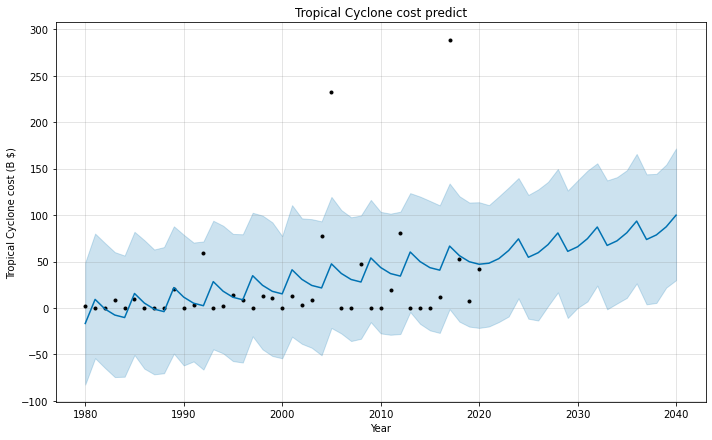

In [128]:
loss_prophet.plot(loss_forecast, xlabel = 'Year', ylabel = 'Tropical Cyclone cost (B $)')
plt.title('Tropical Cyclone cost predict');